#### (1) 데이터 가져오기   
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.   
여기에서 데이터를 상세히 확인할 수 있습니다.

In [141]:
import pandas as pd
file_path = '~/data/data/bike-sharing-demand/train.csv'
data = pd.read_csv(file_path)

df = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X.shape, y.shape)


(10886, 11) (10886,)


#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기   
to_datetime 활용 : 링크 참조   
pandas datetime extract year month day 키워드로 검색해 보기   

In [142]:
data['dtime'] = pd.to_datetime(data['datetime'])
data['year'] = data['dtime'].dt.year
data['month'] = data['dtime'].dt.month
data['day'] = data['dtime'].dt.day
data['hour'] = data['dtime'].dt.hour
data['minute'] = data['dtime'].dt.minute
data['second'] = data['dtime'].dt.second

data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dtime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,0,0


In [143]:
# print(data['hour'].value_counts())
#print(data['minute'].value_counts()) 
#print(data['second'].value_counts()) 

#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기   
sns.countplot 활용해서 시각화하기   
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기   

<AxesSubplot:xlabel='second', ylabel='count'>

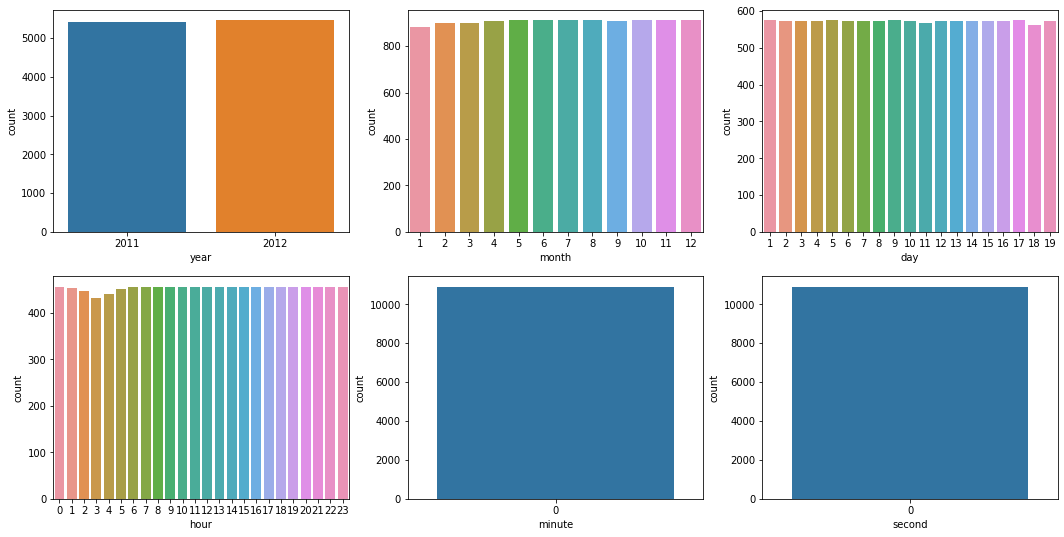

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3, figsize=(18,9))

sns.countplot(x='year', data=data, ax=ax[0, 0])
sns.countplot(x='month', data=data, ax=ax[0, 1])
sns.countplot(x='day', data=data, ax=ax[0, 2])
sns.countplot(x='hour', data=data, ax=ax[1, 0])
sns.countplot(x='minute', data=data, ax=ax[1, 1])
sns.countplot(x='second', data=data, ax=ax[1, 2])

#### (4) X, y 컬럼 선택 및 train/test 데이터 분리   
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?   

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기   

In [145]:
print(data.dtypes)

datetime              object
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtime         datetime64[ns]
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object


<AxesSubplot:>

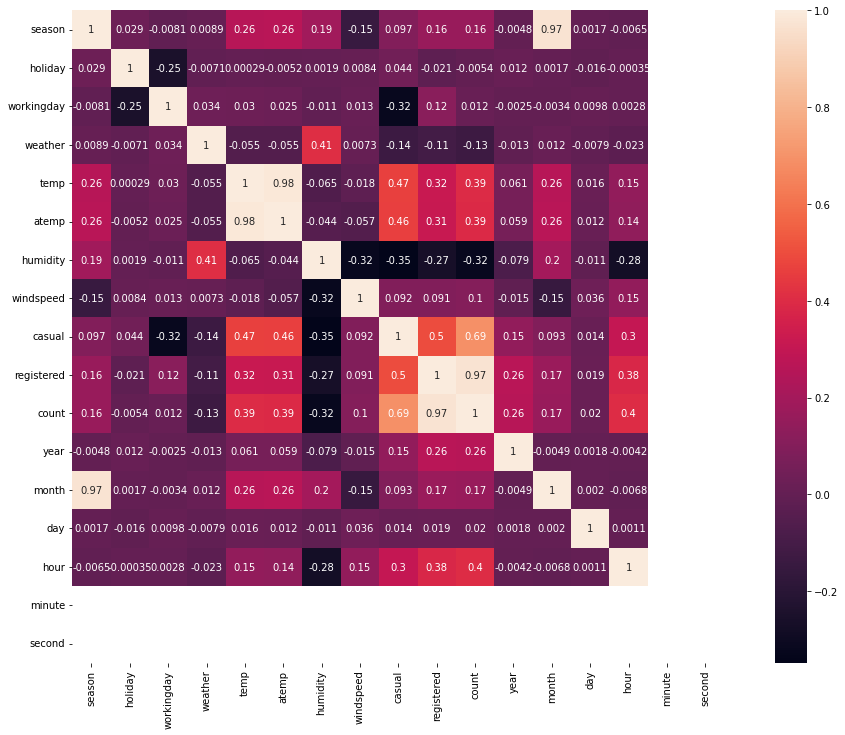

In [146]:
fig = plt.figure(figsize=[18,12])
sns.heatmap(data.corr(),annot=True,square=True)

In [147]:
# coef : 0.5 or 0.7
# multi coll:temp, atemp

In [148]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtime         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

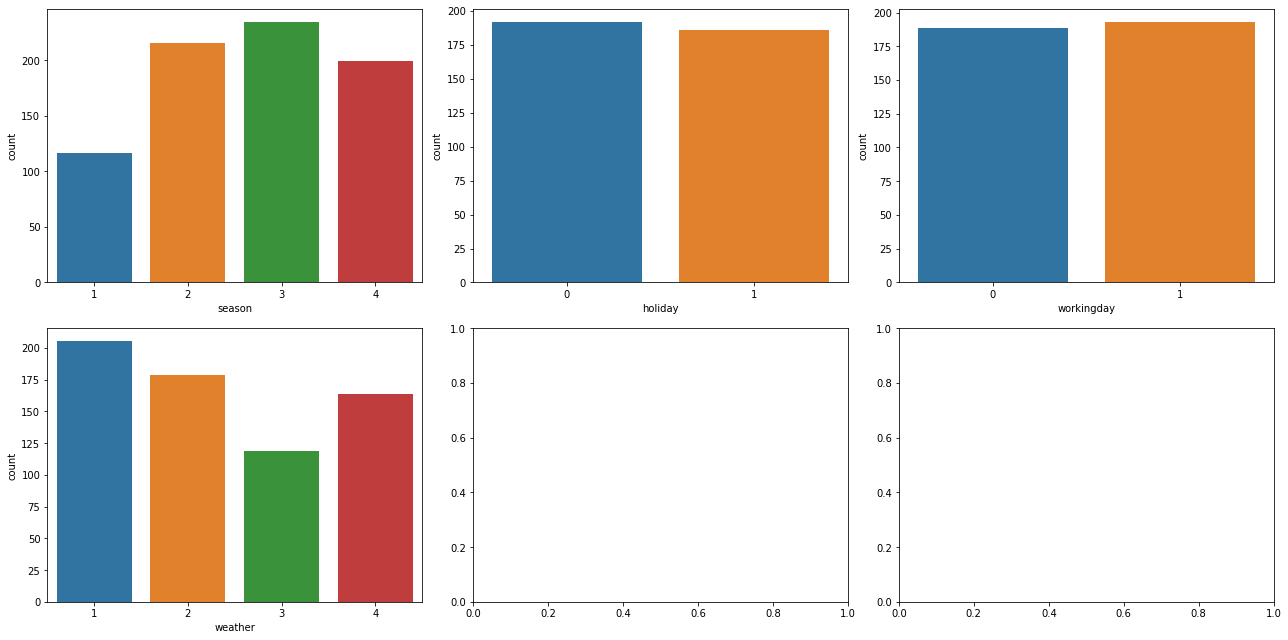

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

sns.barplot(x='season',y='count',data=data.groupby('season')['count'].mean().reset_index(),ax=ax[0, 0])
sns.barplot(x='holiday',y='count',data=data.groupby('holiday')['count'].mean().reset_index(),ax=ax[0, 1])
sns.barplot(x='workingday',y='count',data=data.groupby('workingday')['count'].mean().reset_index(),ax=ax[0, 2])
sns.barplot(x='weather',y='count',data=data.groupby('weather')['count'].mean().reset_index(),ax=ax[1, 0])

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='humidity', ylabel='Count'>

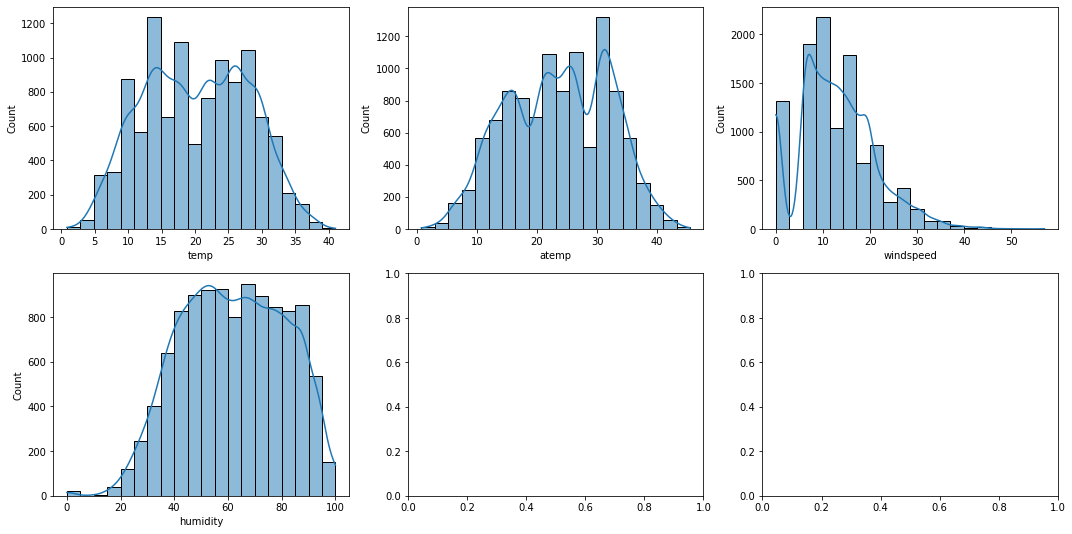

In [150]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

sns.histplot(data['temp'], bins=20, kde=True, ax=ax[0, 0])
sns.histplot(data['atemp'], bins=20, kde=True, ax=ax[0, 1])
sns.histplot(data['windspeed'], bins=20, kde=True, ax=ax[0, 2])
sns.histplot(data['humidity'], bins=20, kde=True, ax=ax[1, 0])


In [155]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dtime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0


In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

columns = ['temp', 'humidity', 'windspeed', 'season', 'weather','hour'] #,'holiday', 'workingday'
X = data[columns]
y = data['count']


scaler = MinMaxScaler()
continuous_features = ['temp', 'humidity', 'windspeed','hour']
X[continuous_features] = scaler.fit_transform(X[continuous_features])


X = pd.get_dummies(X, columns=['season','weather'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


#### (5) LinearRegression 모델 학습   
sklearn의 LinearRegression 모델 불러오기 및 학습하기   

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산   
학습된 모델에 X_test를 입력해서 예측값 출력하기   
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기   
mse 값과 함께 rmse 값도 계산하기   

In [181]:
import numpy as np
y_pred = model.predict(X_test)

rmse =  np.sqrt(mean_squared_error(y_test, y_pred))
rmse

146.59156727007516

#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기   
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기    
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기   

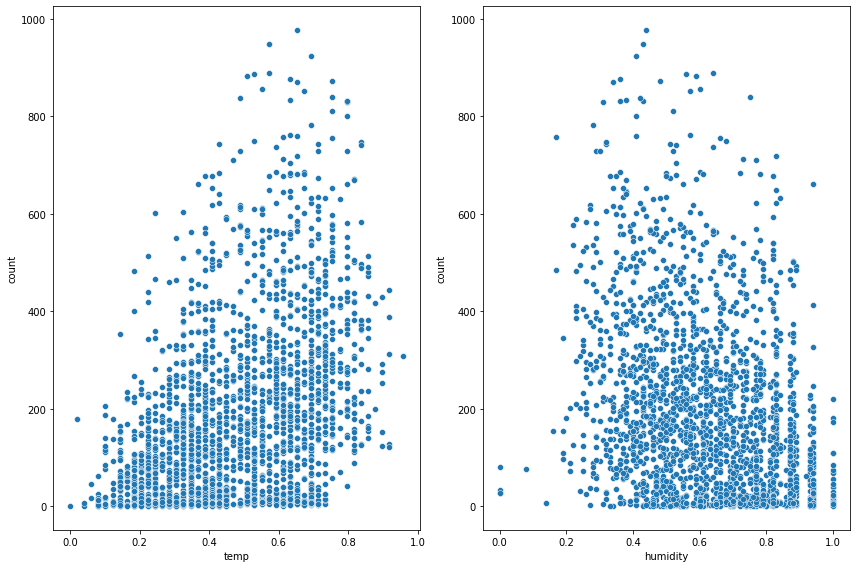

In [199]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(12, 8)) 

sns.scatterplot(x=X_test['temp'], y='count', data=data, ax=ax[0])
plt.xlabel('temp')
plt.ylabel('count')

sns.scatterplot(x=X_test['humidity'], y='count', data=data, ax=ax[1])
plt.xlabel('humidity')
plt.ylabel('count')

plt.tight_layout()
plt.show()
